In [1]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
fb = pd.read_csv("./FB.csv")
twMAU = pd.read_csv("./TwitterMAU.csv")
tw = pd.read_csv("./Tw.csv")

In [3]:
twMAU = twMAU.iloc[::-1]

In [4]:
fb = fb.iloc[::-1]

In [5]:
def fixQuarter(quarter : str, social : str):
    data = quarter.split(" ")
    
    if social == 'fb':
        data = data[:-1]
    
    return data[0] + "'" + data[1][-2:]

def fixTwQuarter(quarter : str):
    data = quarter.split(" ")
    

fb['quarter'] = fb['quarter'].apply(lambda quarter: fixQuarter(quarter, 'fb'))
twMAU['quarter'] = twMAU['quarter'].apply(lambda quarter: fixQuarter(quarter, 'Tw'))

In [6]:
pd.merge(tw, twMAU, on="quarter")

,quarter,DAU,MAU
0,Q1'17,109,327.0
1,Q2'17,110,326.0
2,Q3'17,114,330.0
3,Q4'17,115,330.0
4,Q1'18,120,336.0
5,Q2'18,122,335.0
6,Q3'18,124,326.0
7,Q4'18,126,321.0
8,Q1'19,134,330.0


In [7]:
twMAU

,quarter,MAU
32,Q1'11,68.0
31,Q2'11,85.0
30,Q3'11,101.0
29,Q4'11,117.0
28,Q1'12,138.0
27,Q2'12,151.0
26,Q3'12,167.0
25,Q4'12,185.0
24,Q1'13,204.0
23,Q2'13,218.0


<AxesSubplot:xlabel='quarter', ylabel='DAU'>

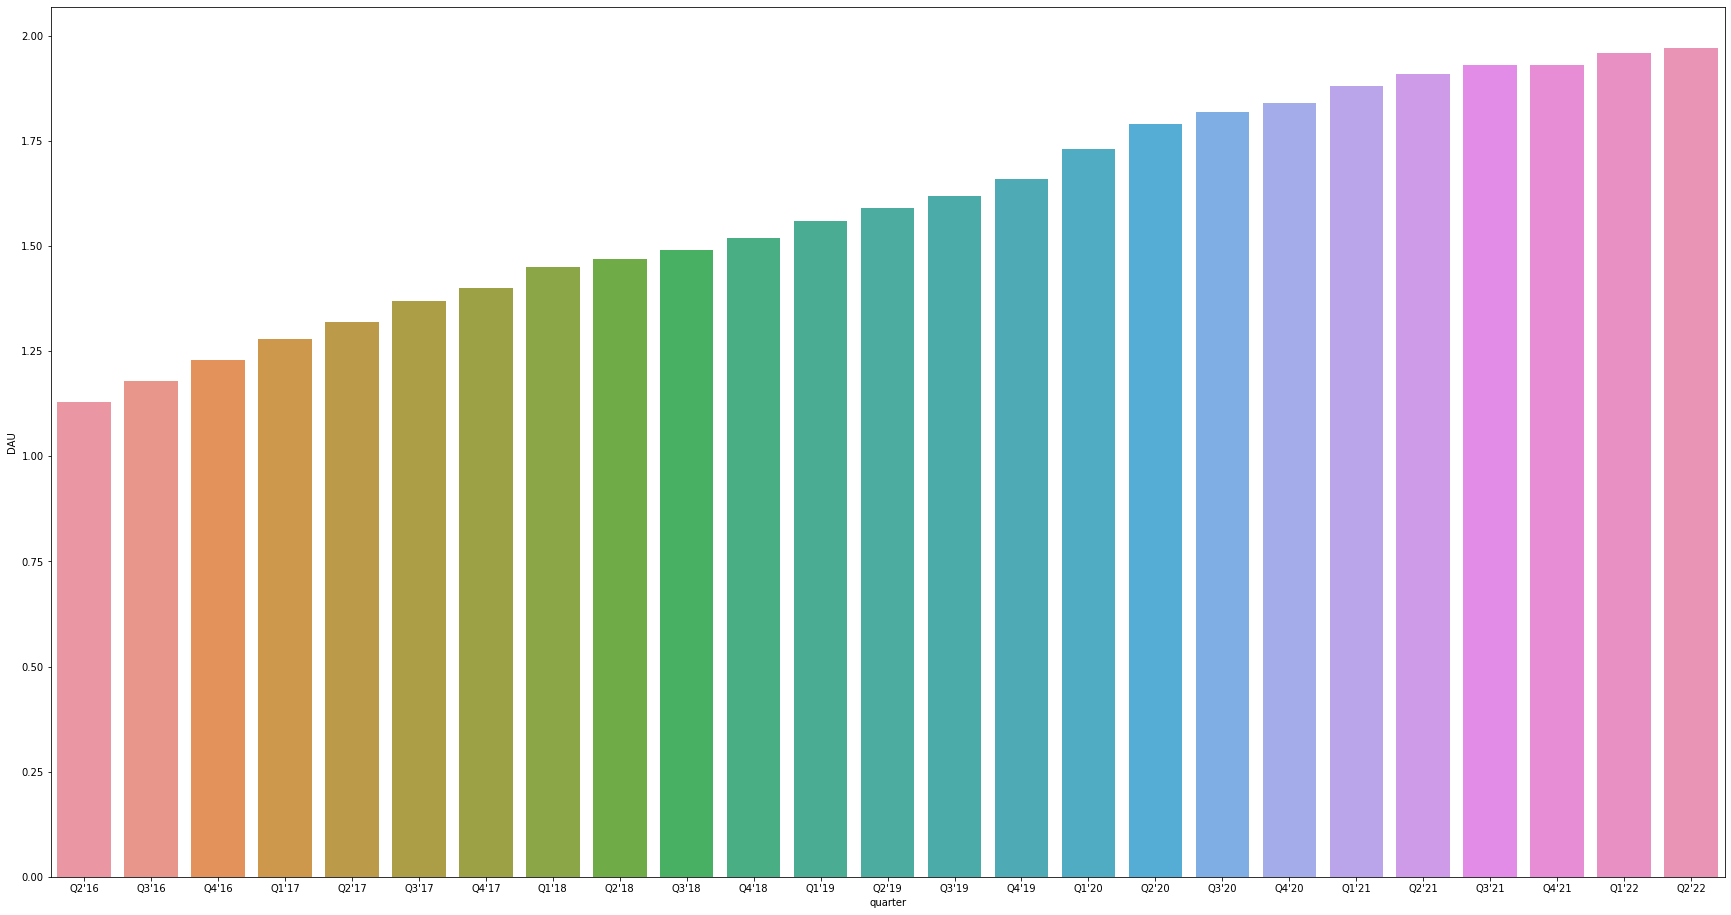

In [8]:
plt.figure(figsize=(30, 16))
sns.barplot(x = 'quarter', y = 'DAU', data=fb)

In [132]:
# dataframe with corrected indexing...
newTwitterMAU = pd.DataFrame(twMAU.iloc[:,:].values,columns=["quarter","MAU"])

In [133]:
# finding appropriate time indices:
print(len(newTwitterMAU['MAU']))
n = len(newTwitterMAU['MAU'])

time_col_values = []
    
if n%2 == 0:
    time_col_values = [x for x in range(-(n-1),n,2)]
else:
    time_col_values = [x for x in range(-(n//2),(n//2)+1)]
    

33


In [134]:
type(time_col_values)

list

In [135]:
import numpy as np

# adding the time dummy:
newTwitterMAU['time'] = np.arange(len(newTwitterMAU.index)) #better option :')

# newTwitterMAU['time'] = time_col_values 

# updated dataframe
# print(newTwitterMAU)

In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
df = newTwitterMAU.copy()

In [138]:
#training data:

X = df.loc[:,['time']]
Y = df.loc[:,['MAU']]

model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [139]:
# a list with time indices corressponding to future quarters:
time_indices = range(33,65) #Q2 2019 to #Q4 2021 

data_values = {"time":time_indices}

# test data
x_test = pd.DataFrame(data_values)
# print(x_test)

In [140]:
y_pred = model.predict(x_test)

In [141]:
print(y_pred[:10])

[[391.60340909]
 [399.59131016]
 [407.57921123]
 [415.5671123 ]
 [423.55501337]
 [431.54291444]
 [439.53081551]
 [447.51871658]
 [455.50661765]
 [463.49451872]]


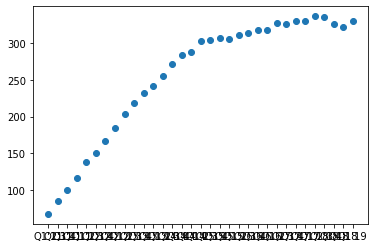

In [142]:
plt.scatter(newTwitterMAU['quarter'],newTwitterMAU['MAU'])
plt.show()

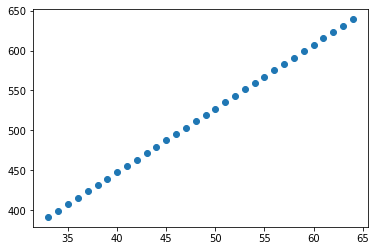

In [143]:
plt.scatter(x_test,y_pred)
plt.show()